In [60]:
import sys
import numpy as np
import sklearn
import matplotlib
import pandas as pd

In [61]:
# Read the training data to DF
names = ["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]
df = pd.read_csv("train.csv", names = names)

In [62]:
print(df.shape)

# drop the first row as contain column names
df = df.drop(df.index[0])

print(df.head())

(892, 12)
  PassengerId Survived Pclass  \
1           1        0      3   
2           2        1      1   
3           3        1      3   
4           4        1      1   
5           5        0      3   

                                                Name     Sex Age SibSp Parch  \
1                            Braund, Mr. Owen Harris    male  22     1     0   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38     1     0   
3                             Heikkinen, Miss. Laina  female  26     0     0   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35     1     0   
5                           Allen, Mr. William Henry    male  35     0     0   

             Ticket     Fare Cabin Embarked  
1         A/5 21171     7.25   NaN        S  
2          PC 17599  71.2833   C85        C  
3  STON/O2. 3101282    7.925   NaN        S  
4            113803     53.1  C123        S  
5            373450     8.05   NaN        S  


In [63]:
# remove the un-neccsary columns
df = df.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked', 'Fare'], axis = 1)

print("df columns : {}".format(df.columns))

df columns : Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')


In [64]:
# do label endcoding the gender feature
from sklearn.preprocessing import LabelEncoder

cat_features = ['Sex']
encoder = LabelEncoder()
encoded = df[cat_features].apply(encoder.fit_transform)

data_cols = ["Survived", "Pclass", "Age", "SibSp", "Parch"]
df_new = df[data_cols].join(encoded)

In [75]:
# Simple Imputer to replace empty age with mean value

from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
imputed_X = pd.DataFrame(imputer.fit_transform(df_new))

imputed_X.columns = df_new.columns

In [77]:
print("df_new columns : {}".format(imputed_X.columns))

print(imputed_X.head(20))

df_new columns : Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex'], dtype='object')
    Survived  Pclass        Age  SibSp  Parch  Sex
0        0.0     3.0  22.000000    1.0    0.0  1.0
1        1.0     1.0  38.000000    1.0    0.0  0.0
2        1.0     3.0  26.000000    0.0    0.0  0.0
3        1.0     1.0  35.000000    1.0    0.0  0.0
4        0.0     3.0  35.000000    0.0    0.0  1.0
5        0.0     3.0  29.699118    0.0    0.0  1.0
6        0.0     1.0  54.000000    0.0    0.0  1.0
7        0.0     3.0   2.000000    3.0    1.0  1.0
8        1.0     3.0  27.000000    0.0    2.0  0.0
9        1.0     2.0  14.000000    1.0    0.0  0.0
10       1.0     3.0   4.000000    1.0    1.0  0.0
11       1.0     1.0  58.000000    0.0    0.0  0.0
12       0.0     3.0  20.000000    0.0    0.0  1.0
13       0.0     3.0  39.000000    1.0    5.0  1.0
14       0.0     3.0  14.000000    0.0    0.0  0.0
15       1.0     2.0  55.000000    0.0    0.0  0.0
16       0.0     3.0   2.000000    4.0

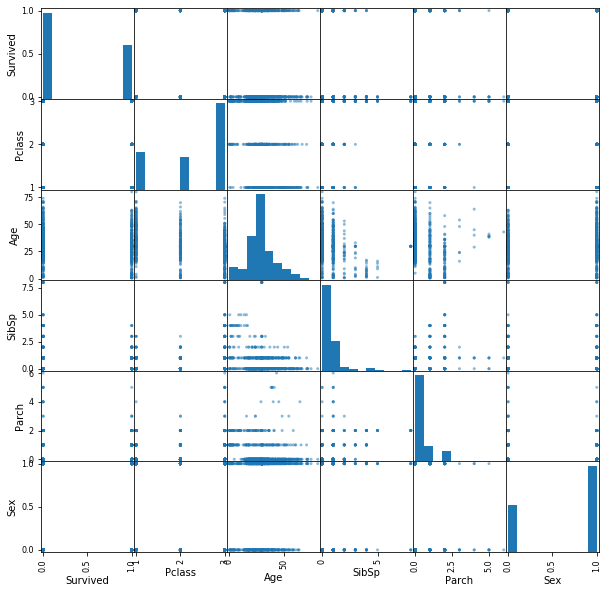

In [78]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Display the scatter matrix plot
scatter_matrix(imputed_X, figsize = (10,10))
plt.show()

In [95]:
print(imputed_X.shape)


# Conver the df to numpy array
dataset = imputed_X.values

print(dataset.shape)

# Split that into input (X) and output (Y)
X = dataset[:,1:6]
Y = dataset[:,0].astype(int)

(891, 6)
(891, 6)


In [96]:
print(X.shape)
print(Y.shape)
print(Y[:])

(891, 5)
(891,)
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 

In [105]:
# split the taining data to training and validaion dataset
from sklearn.model_selection import train_test_split,KFold

# Define a seed for reproducibility
seed = 1

x_train, x_valid, y_train, y_valid = train_test_split(X,Y,test_size = 0.2, random_state = seed, stratify=Y)

In [104]:
print(y_train.shape)

(712,)


In [103]:
print(y_valid.shape)

(179,)


In [127]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the scoring methods
scoring = "accuracy"

# Name the classifier to train model
names = ["K Nearest Neaighbours", "SVM Linear", "Decision Tree", "Random Forest", "AdaBoost"]

classifier = [
    KNeighborsClassifier(n_neighbors = 5),
    RandomForestClassifier(max_depth = 5, max_features=5, n_estimators=10),
    SVC(kernel='linear'),
    DecisionTreeClassifier(max_depth = 5),
    AdaBoostClassifier()
]

# Create dictionary
models = zip(names,classifier)

for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring)
    print("{0}: {1} {2}".format(name, cv_results.mean(), cv_results.std()))
    model.fit(x_train,y_train)
    predictions = model.predict(x_valid)
    print(accuracy_score(y_valid,predictions))    
    


K Nearest Neaighbours: 0.7613654147104852 0.05509660560143505
0.7821229050279329
SVM Linear: 0.8033059467918624 0.0483762744051106
0.8268156424581006
Decision Tree: 0.7822769953051644 0.039023345648843966
0.8044692737430168
Random Forest: 0.7991197183098592 0.0478954140846409
0.8324022346368715
AdaBoost: 0.7977699530516432 0.03824890693616125
0.776536312849162


In [138]:
# Make predictioon on testing data

# Read the training data to DF
names = ["PassengerId", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]
df = pd.read_csv("test.csv", names = names)

print(df.shape)

# drop the first row as contain column names
df = df.drop(df.index[0])

print(df.head())

## store the passenger column
passenger_col = df['PassengerId']

# remove the un-neccsary columns
df = df.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked', 'Fare'], axis = 1)

# do label endcoding the gender feature
from sklearn.preprocessing import LabelEncoder

cat_features = ['Sex']
encoder = LabelEncoder()
encoded = df[cat_features].apply(encoder.fit_transform)

data_cols = ["Pclass", "Age", "SibSp", "Parch"]
df_new = df[data_cols].join(encoded)

# Simple Imputer to replace empty age with mean value

from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
imputed_X = pd.DataFrame(imputer.fit_transform(df_new))

imputed_X.columns = df_new.columns

print("df columns : {}".format(df.columns))

print(imputed_X.shape)
print(imputed_X.describe())


# Conver the df to numpy array
dataset = imputed_X.values

print(dataset.shape)

# Split that into input (X) and output (Y)
X_test = dataset

(419, 11)
  PassengerId Pclass                                          Name     Sex  \
1         892      3                              Kelly, Mr. James    male   
2         893      3              Wilkes, Mrs. James (Ellen Needs)  female   
3         894      2                     Myles, Mr. Thomas Francis    male   
4         895      3                              Wirz, Mr. Albert    male   
5         896      3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age SibSp Parch   Ticket     Fare Cabin Embarked  
1  34.5     0     0   330911   7.8292   NaN        Q  
2    47     1     0   363272        7   NaN        S  
3    62     0     0   240276   9.6875   NaN        Q  
4    27     0     0   315154   8.6625   NaN        S  
5    22     1     1  3101298  12.2875   NaN        S  
df columns : Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')
(418, 5)
           Pclass         Age       SibSp       Parch         Sex
count  418.000000  418.000000  418.00

In [137]:
print(X_test.shape)
print(X_test[0:10])

(418, 5)
[[ 3.  34.5  0.   0.   1. ]
 [ 3.  47.   1.   0.   0. ]
 [ 2.  62.   0.   0.   1. ]
 [ 3.  27.   0.   0.   1. ]
 [ 3.  22.   1.   1.   0. ]
 [ 3.  14.   0.   0.   1. ]
 [ 3.  30.   0.   0.   0. ]
 [ 2.  26.   1.   1.   1. ]
 [ 3.  18.   0.   0.   0. ]
 [ 3.  21.   2.   0.   1. ]]


In [140]:
# train and predict the model on testing data
model = SVC(kernel='linear')
model.fit(x_train,y_train)
predictions = model.predict(X_test)


In [144]:
my_submission = pd.DataFrame({'PassengerId': passenger_col, 'Survived': predictions})
my_submission.to_csv('./output/gender_submission.csv', index=False)